In [152]:
import pandas as pd
import numpy as np

In [153]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [154]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [155]:
total_score_df = deliveries.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()

In [156]:
total_score_df[total_score_df["inning"] == 1]

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [157]:
matches["team1"].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: count, dtype: int64

In [158]:
teams =['Royal Challengers Bangalore',
        'Kings XI Punjab',
        'Mumbai Indians', 
        'Kolkata Knight Riders',
        'Rajasthan Royals',
        'Chennai Super Kings',
        'Sunrisers Hyderabad',
        'Delhi Capitals', 
        'Lucknow Super Giants', 
        'Gujarat Titans']

In [159]:
matches["team1"] =matches["team1"].str.replace('Delhi Daredevils' , 'Delhi Capitals')
matches["team2"] =matches["team2"].str.replace('Delhi Daredevils' , 'Delhi Capitals')

matches["team1"] =matches["team1"].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')
matches["team2"] =matches["team2"].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')

matches["team1"] =matches["team1"].str.replace('Punjab Kings' , 'Kings XI Punjab')
matches["team2"] =matches["team2"].str.replace('Punjab Kings' , 'Kings XI Punjab')

matches["team1"] =matches["team1"].str.replace('Royal Challengers Bengaluru' , 'Royal Challengers Bangalore')
matches["team2"] =matches["team2"].str.replace('Royal Challengers Bengaluru' , 'Royal Challengers Bangalore')

In [160]:
matches["team1"].value_counts()

team1
Royal Challengers Bangalore    144
Chennai Super Kings            128
Delhi Capitals                 126
Sunrisers Hyderabad            125
Kings XI Punjab                123
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Pune Warriors                   23
Lucknow Super Giants            23
Gujarat Titans                  21
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: count, dtype: int64

In [161]:
matches = matches[matches['team1'].isin(teams)]
matches = matches[matches['team2'].isin(teams)]
# 

In [162]:
matches= matches[matches["method"] !='D/L']
#matches['method'].unique() , matches.shape
matches.drop(['method'] ,axis=1 ,inplace=True)
matches.shape

(963, 19)

In [163]:

matches = matches[['id','city' , 'winner','target_runs']]
matches.head()


,id,city,winner,target_runs
0,335982,Bangalore,Kolkata Knight Riders,223.0
1,335983,Chandigarh,Chennai Super Kings,241.0
2,335984,Delhi,Delhi Daredevils,130.0
3,335985,Mumbai,Royal Challengers Bangalore,166.0
4,335986,Kolkata,Kolkata Knight Riders,111.0


In [164]:
deliveries["batting_team"] =deliveries["batting_team"].str.replace('Delhi Daredevils' , 'Delhi Capitals')
deliveries["bowling_team"] =deliveries["bowling_team"].str.replace('Delhi Daredevils' , 'Delhi Capitals')

deliveries["batting_team"] =deliveries["batting_team"].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')
deliveries["bowling_team"] =deliveries["bowling_team"].str.replace('Deccan Chargers' , 'Sunrisers Hyderabad')

deliveries["batting_team"] =deliveries["batting_team"].str.replace('Punjab Kings' , 'Kings XI Punjab')
deliveries["bowling_team"] =deliveries["bowling_team"].str.replace('Punjab Kings' , 'Kings XI Punjab')

deliveries["batting_team"] =deliveries["batting_team"].str.replace('Royal Challengers Bengaluru' , 'Royal Challengers Bangalore')
deliveries["bowling_team"] =deliveries["bowling_team"].str.replace('Royal Challengers Bengaluru' , 'Royal Challengers Bangalore')


deliveries = deliveries[deliveries['batting_team'].isin(teams)]
deliveries = deliveries[deliveries['bowling_team'].isin(teams)]
# 

In [165]:
deliveries = matches.merge(deliveries , left_on='id' , right_on='match_id')

In [166]:
deliveries = deliveries[deliveries['inning'] == 2]

In [167]:
deliveries['curr_score'] = deliveries.groupby('id')['total_runs'].cumsum()

In [168]:
deliveries['runs_left'] = deliveries['target_runs'] - deliveries['curr_score']

In [169]:
deliveries['ball_left']= 120 - (deliveries['over']*6+deliveries['ball'])


In [170]:
deliveries['wicket_falls'] = deliveries.groupby('id')['is_wicket'].cumsum()

In [171]:
deliveries['wicket_left'] = 10 - deliveries['wicket_falls']

In [172]:
deliveries['crr'] = deliveries['curr_score']/(deliveries['over']+(deliveries['ball']/6))

In [173]:
deliveries['rrr'] = (deliveries['runs_left']*6)/deliveries['ball_left']

In [174]:
deliveries['crr'] = deliveries['curr_score']*6/(120-deliveries['ball_left'])

In [175]:
deliveries['result'] = deliveries.apply(lambda row: 1 if row['batting_team'] == row['winner'] else 0, axis=1)

In [176]:
temp = deliveries
deliveries.head(3)

,id,city,winner,target_runs,match_id,inning,batting_team,bowling_team,over,ball,...,dismissal_kind,fielder,curr_score,runs_left,ball_left,wicket_falls,wicket_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,...,NaN,NaN,1,222.0,119,0,10,6.0,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,...,NaN,NaN,2,221.0,118,0,10,6.0,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,223.0,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,...,NaN,NaN,2,221.0,117,0,10,4.0,11.333333,0


In [177]:
deliveries["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [178]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# cols_to_encode = ['batting_team', 'bowling_team', 'city']

# for col in cols_to_encode:
#     temp[col] = le.fit_transform(temp[col])

In [ ]:
# Create your manual mapping
team_mapping = {
    'Royal Challengers Bangalore': 0,
    'Kings XI Punjab': 1,
    'Mumbai Indians': 2,
    'Kolkata Knight Riders': 3,
    'Rajasthan Royals': 4,
    'Chennai Super Kings': 5,
    'Sunrisers Hyderabad': 6,
    'Delhi Capitals': 7,
    'Lucknow Super Giants': 8,
    'Gujarat Titans': 9,
    'Pune Warriors': 10   # if needed
}
# Manual mapping for city
city_mapping = {
    'Bangalore': 0,
    'Chandigarh': 1,
    'Delhi': 2,
    'Mumbai': 3,
    'Kolkata': 4,
    'Jaipur': 5,
    'Hyderabad': 6,
    'Chennai': 7,
    'Cape Town': 8,
    'Port Elizabeth': 9,
    'Durban': 10,
    'Centurion': 11,
    'East London': 12,
    'Johannesburg': 13,
    'Kimberley': 14,
    'Bloemfontein': 15,
    'Ahmedabad': 16,
    'Cuttack': 17,
    'Nagpur': 18,
    'Dharamsala': 19,
    'Visakhapatnam': 20,
    'Pune': 21,
    'Raipur': 22,
    'Ranchi': 23,
    'Abu Dhabi': 24,
    'Bengaluru': 25,   
    'Indore': 26,
    'Dubai': 27,
    'Sharjah': 28,
    'Navi Mumbai': 29,
    'Lucknow': 30,
    'Guwahati': 31,
    'Mohali': 32
}

# Apply mapping
deliveries['city'] = deliveries['city'].map(city_mapping)
# Apply mapping manually
deliveries['batting_team'] = deliveries['batting_team'].map(team_mapping)
deliveries['bowling_team'] = deliveries['bowling_team'].map(team_mapping)


In [180]:
deliveries = deliveries[['batting_team' ,'bowling_team', 'city' , 'runs_left', 'ball_left','wicket_left' , 'target_runs' , 'crr', 'rrr' , 'result']]

In [181]:
deliveries = deliveries.sample(deliveries.shape[0])


In [182]:
deliveries['batting_team'].value_counts()

batting_team
7    14860
2    13764
3    13603
0    13190
6    13125
4    12998
1    12604
5    12171
9     2880
8     2526
Name: count, dtype: int64

In [183]:

deliveries.dropna(inplace=True)
deliveries.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
ball_left       0
wicket_left     0
target_runs     0
crr             0
rrr             0
result          0
dtype: int64

In [184]:
# as min and max of rrr -inf to +inf
# so 
deliveries = deliveries[deliveries['ball_left'] != 0]

In [185]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols_to_encode = ['batting_team', 'bowling_team', 'city']

for col in cols_to_encode:
    deliveries[col] = le.fit_transform(deliveries[col])


In [186]:
x=deliveries.iloc[:,:-1]
y=deliveries['result']

In [187]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,train_size=.2,random_state=42)

In [188]:
x_train['batting_team'].unique()

array([0, 7, 3, 2, 5, 4, 1, 9, 6, 8])

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [190]:
pipe = Pipeline(steps=[
    ('step1',LogisticRegression(solver='liblinear'))
])

In [191]:
pipe.fit(x_train,y_train)

,steps,"[('step1', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None


In [192]:
y_pred = pipe.predict(x_test)

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7462711361613764

In [194]:
pipe.predict_proba(x_test)[2]

array([0.43312553, 0.56687447])

In [195]:
deliveries.describe()

,batting_team,bowling_team,city,runs_left,ball_left,wicket_left,target_runs,crr,rrr,result
count,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000
mean,3.787722,3.677169,8.892456,94.821364,62.729484,7.510532,169.635325,7.608051,10.736121,0.454335
std,2.509644,2.461388,8.799162,50.954863,33.310573,2.154919,30.813049,2.356434,14.188995,0.497913
min,0.000000,0.000000,0.000000,-5.000000,-3.000000,0.000000,63.000000,0.000000,-516.000000,0.000000
25%,2.000000,2.000000,3.000000,55.000000,35.000000,6.000000,150.000000,6.400000,7.345794,0.000000
50%,4.000000,4.000000,5.000000,94.000000,63.000000,8.000000,169.000000,7.630435,9.082569,0.000000
75%,6.000000,6.000000,15.000000,133.000000,92.000000,9.000000,189.000000,8.875000,11.282051,1.000000
max,9.000000,9.000000,32.000000,287.000000,119.000000,10.000000,288.000000,36.000000,714.000000,1.000000


In [196]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','ball_left','wicket_left','target_runs','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['ball_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['bowling_team'] = np.round(result.T[0]*100,1)
    temp_df['batting_team'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['target_runs'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wicket_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','bowling_team','batting_team']]
    return temp_df,target

In [197]:
temp_df,target = match_progression(temp,335982,pipe)
temp_df

Target- 223.0


,end_of_over,runs_after_over,wickets_in_over,bowling_team,batting_team
129,1,4.0,0,86.4,13.6
136,2,5.0,1,91.1,8.9
142,3,2.0,1,94.8,5.2
149,4,5.0,0,94.7,5.3
155,5,8.0,1,96.2,3.8
161,6,2.0,1,97.9,2.1
167,7,3.0,0,98.0,2.0
175,8,9.0,1,98.6,1.4
181,9,3.0,1,99.2,0.8
189,10,9.0,1,99.4,0.6


Text(0.5, 1.0, 'Target-223.0')

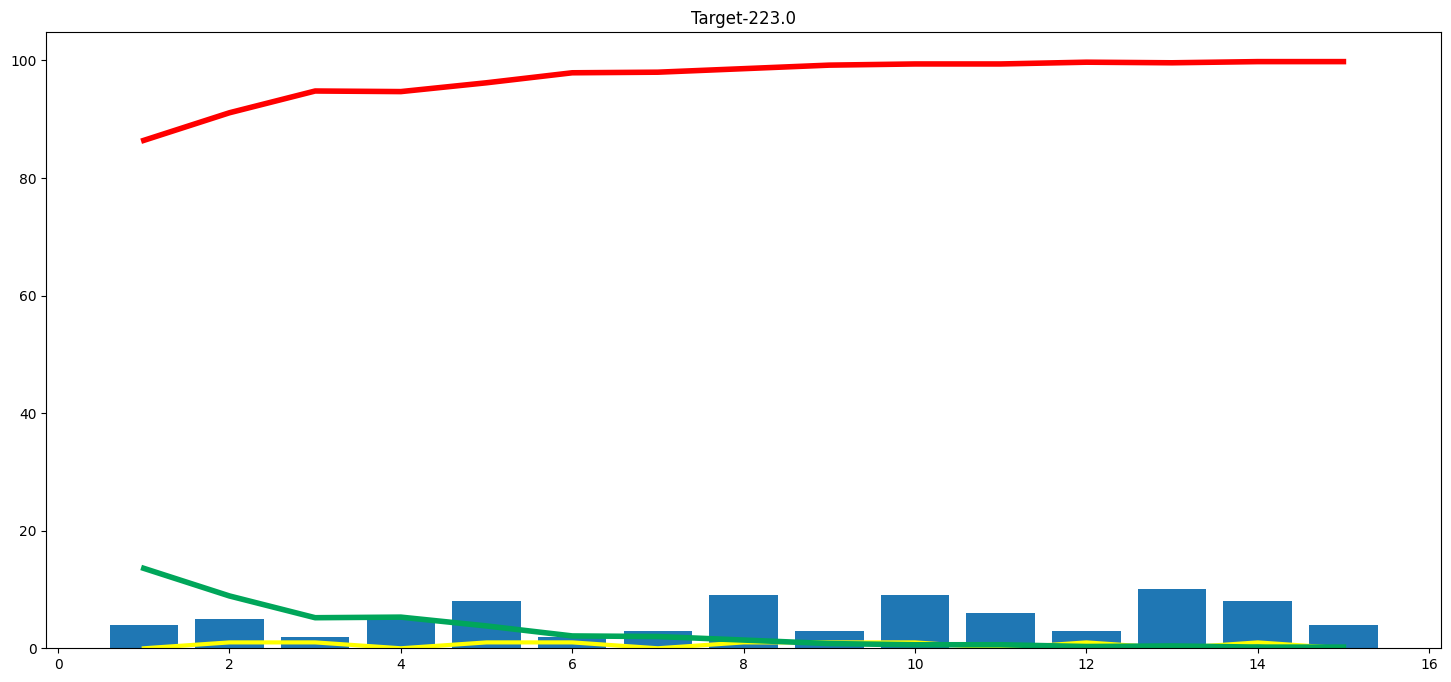

In [198]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['batting_team'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['bowling_team'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [199]:
matches.tail()

,id,city,winner,target_runs
1090,1426307,Hyderabad,Sunrisers Hyderabad,215.0
1091,1426309,Ahmedabad,Kolkata Knight Riders,160.0
1092,1426310,Ahmedabad,Rajasthan Royals,173.0
1093,1426311,Chennai,Sunrisers Hyderabad,176.0
1094,1426312,Chennai,Kolkata Knight Riders,114.0


In [200]:
teams

['Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [201]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [202]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))